In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from recommenders.datasets import movielens
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.evaluation.python_evaluation import rmse, mae
from sklearn.model_selection import train_test_split
import os

c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)



In [4]:
# Tải dữ liệu MovieLens 100K
data = movielens.load_pandas_df(
    size="100k",
    header=["userID", "itemID", "rating", "timestamp"]
)
data = data[["userID", "itemID", "rating"]]
data.head()

INFO:recommenders.datasets.download_utils:Downloading https://files.grouplens.org/datasets/movielens/ml-100k.zip
100%|██████████| 4.81k/4.81k [00:03<00:00, 1.29kKB/s]


,userID,itemID,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [5]:
n_runs = 10
rmse_list = []
mae_list = []

for i in range(n_runs):
    # Tách train/test ngẫu nhiên mỗi lần
    train, test = train_test_split(data, test_size=0.2, random_state=42+i)
    train = train.sort_values(by="userID")
    train_path = f"train_{i}.csv"
    train.to_csv(train_path, index=False)
    
    # Chuẩn bị dữ liệu cho NCF
    ncf_data = NCFDataset(train_path, seed=42+i)
    ncf_model = NCF(
        n_users=ncf_data.n_users,
        n_items=ncf_data.n_items,
        model_type="NeuMF",
        batch_size=256,
        learning_rate=0.001,
        seed=42+i
    )
    ncf_model.fit(ncf_data)
    
    # Dự đoán trên test
    valid_users = set(train["userID"].unique())
    valid_items = set(train["itemID"].unique())
    predictions = []
    test_filtered = []
    for u, it, rating in zip(test["userID"], test["itemID"], test["rating"]):
        if u in valid_users and it in valid_items:
            pred = ncf_model.predict(u, it)
            predictions.append(pred)
            test_filtered.append((u, it, rating))
    df_pred = pd.DataFrame(test_filtered, columns=["userID", "itemID", "rating"])
    df_pred["prediction"] = predictions
    
    # Đánh giá
    rmse_score = rmse(
        rating_true=test,
        rating_pred=df_pred,
        col_user="userID",
        col_item="itemID",
        col_rating="rating",
        col_prediction="prediction"
    )
    mae_score = mae(
        rating_true=test,
        rating_pred=df_pred,
        col_user="userID",
        col_item="itemID",
        col_rating="rating",
        col_prediction="prediction"
    )
    rmse_list.append(rmse_score)
    mae_list.append(mae_score)
    print(f"Lan {i+1}: RMSE = {rmse_score:.4f} | MAE = {mae_score:.4f}")
    os.remove(train_path)

INFO:recommenders.models.ncf.dataset:Indexing train_0.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [20.50s]: train_loss = 0.398231 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [16.67s]: train_loss = 0.327310 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [4.52s]: train_loss = 0.310151 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [9.58s]: train_loss = 0.301218 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [9.59s]: train_loss = 0.292049 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [9.35s]: train_loss = 0.283611 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [8.81s]: train_loss = 0.276659 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [9

Lan 1: RMSE = 3.1964 | MAE = 3.0042


INFO:recommenders.models.ncf.dataset:Indexing train_1.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [10.56s]: train_loss = 0.411355 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [9.93s]: train_loss = 0.337724 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [9.41s]: train_loss = 0.315355 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [8.96s]: train_loss = 0.303948 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [10.90s]: train_loss = 0.294933 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [9.46s]: train_loss = 0.286556 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [10.11s]: train_loss = 0.280478 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [10

Lan 2: RMSE = 3.1895 | MAE = 2.9974


INFO:recommenders.models.ncf.dataset:Indexing train_2.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [22.95s]: train_loss = 0.398528 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [23.74s]: train_loss = 0.334635 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [22.96s]: train_loss = 0.314512 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [23.59s]: train_loss = 0.304518 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [23.40s]: train_loss = 0.296189 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [23.32s]: train_loss = 0.286892 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [23.41s]: train_loss = 0.278694 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8

Lan 3: RMSE = 3.2044 | MAE = 3.0105


INFO:recommenders.models.ncf.dataset:Indexing train_3.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [23.10s]: train_loss = 0.426775 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [22.70s]: train_loss = 0.356099 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [25.14s]: train_loss = 0.337649 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [22.98s]: train_loss = 0.317653 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [23.80s]: train_loss = 0.305017 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [24.40s]: train_loss = 0.295894 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [27.50s]: train_loss = 0.288361 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8

Lan 4: RMSE = 3.1859 | MAE = 2.9932


INFO:recommenders.models.ncf.dataset:Indexing train_4.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [9.56s]: train_loss = 0.498976 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [9.27s]: train_loss = 0.357543 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [9.78s]: train_loss = 0.339573 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [9.14s]: train_loss = 0.333344 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [9.74s]: train_loss = 0.327458 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [9.30s]: train_loss = 0.322941 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [9.34s]: train_loss = 0.318912 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [8.75s

Lan 5: RMSE = 3.2209 | MAE = 3.0258


INFO:recommenders.models.ncf.dataset:Indexing train_5.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [10.57s]: train_loss = 0.399383 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [8.52s]: train_loss = 0.329323 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [9.47s]: train_loss = 0.311219 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [8.92s]: train_loss = 0.302034 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [8.80s]: train_loss = 0.292783 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [9.04s]: train_loss = 0.285539 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [8.63s]: train_loss = 0.278419 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [8.68

Lan 6: RMSE = 3.2013 | MAE = 3.0088


INFO:recommenders.models.ncf.dataset:Indexing train_6.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [10.26s]: train_loss = 0.405034 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [9.95s]: train_loss = 0.342156 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [9.69s]: train_loss = 0.320914 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [10.47s]: train_loss = 0.307230 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [10.67s]: train_loss = 0.296806 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [9.51s]: train_loss = 0.289769 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [9.38s]: train_loss = 0.282316 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [9.

Lan 7: RMSE = 3.2041 | MAE = 3.0094


INFO:recommenders.models.ncf.dataset:Indexing train_7.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [9.88s]: train_loss = 0.414341 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [8.66s]: train_loss = 0.337974 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [8.96s]: train_loss = 0.316478 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [8.89s]: train_loss = 0.306099 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [10.12s]: train_loss = 0.296804 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [8.51s]: train_loss = 0.287566 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [10.20s]: train_loss = 0.279896 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [10.

Lan 8: RMSE = 3.1895 | MAE = 2.9942


INFO:recommenders.models.ncf.dataset:Indexing train_8.csv ...
c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [15.64s]: train_loss = 0.412790 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [12.03s]: train_loss = 0.332526 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [13.88s]: train_loss = 0.313399 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [15.29s]: train_loss = 0.304714 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [14.24s]: train_loss = 0.297558 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [14.93s]: train_loss = 0.291821 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [13.79s]: train_loss = 0.285881 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8

Lan 9: RMSE = 3.2106 | MAE = 3.0183


c:\Users\USER\.conda\envs\recommenders-env\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 1 [22.90s]: train_loss = 0.390555 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 2 [13.48s]: train_loss = 0.325341 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 3 [12.70s]: train_loss = 0.306289 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 4 [10.31s]: train_loss = 0.294929 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 5 [10.58s]: train_loss = 0.285720 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 6 [8.66s]: train_loss = 0.277760 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 7 [9.58s]: train_loss = 0.273377 
INFO:recommenders.models.ncf.ncf_singlenode:Epoch 8 [9.35s]: train_loss = 0.269171 
INFO:recommenders.models.ncf.nc

Lan 10: RMSE = 3.2072 | MAE = 3.0154


In [6]:
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)

print(f"\nTrung binh sau {n_runs} lan:")
print(f"RMSE trung binh: {mean_rmse:.4f}")
print(f"MAE trung binh: {mean_mae:.4f}")


Trung binh sau 10 lan:
RMSE trung binh: 3.2010
MAE trung binh: 3.0077


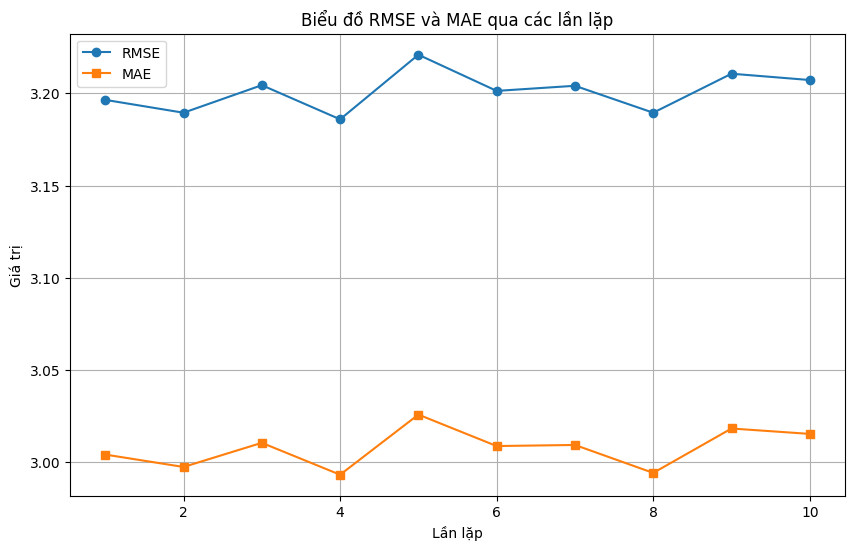

In [10]:
iterations = np.arange(1, n_runs+1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_list, marker='o', label='RMSE')
plt.plot(iterations, mae_list, marker='s', label='MAE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ RMSE và MAE qua các lần lặp')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import pickle

with open('ncf_model.pkl', 'wb') as f:
    pickle.dump(ncf_model, f)

print("Luu mo hinh thanh cong")

TypeError: cannot pickle 'SymbolicTensor' object